# import librarys

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import os

# read csv files and compine it

In [17]:
df = pd.DataFrame()
for file in [file for file in os.listdir("Sales_Data/") if file.endswith(".csv")]:
    current = pd.read_csv("Sales_Data/" + file)
    df = pd.concat([df, current])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


## clean data

In [18]:
df.dropna(inplace=True)

- drop missing values!

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### drop duplicated and change data type of columns

In [20]:
df.drop_duplicates(inplace=True)
df.drop(df[df["Quantity Ordered"] == "Quantity Ordered"].index, inplace=True)
df['Price Each'] = df['Price Each'].astype(float)
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Order Date"] = pd.to_datetime(df["Order Date"])

/tmp/ipykernel_13342/2741326400.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"])


- #### initialize a new column "state"

In [21]:
df["state"] = df["Purchase Address"].apply(lambda x : x.split(",")[1])

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,state
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",Austin
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",Austin
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",Austin
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",San Francisco


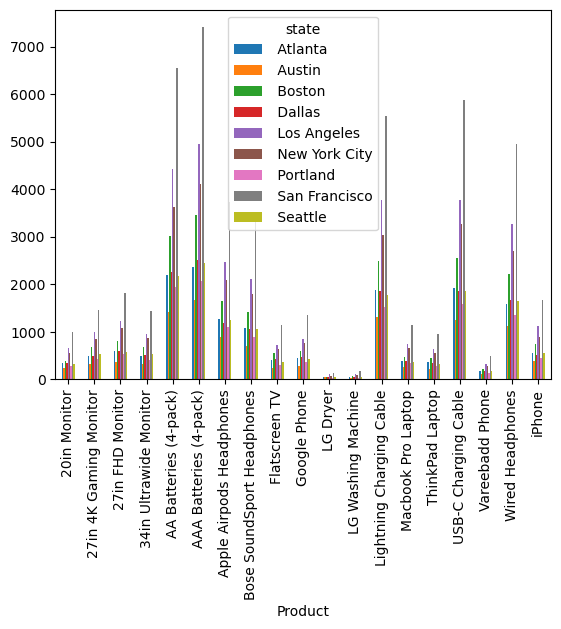

In [23]:
df.groupby(["Product", "state"])["Quantity Ordered"].sum().unstack().plot(kind="bar")
plt.show()

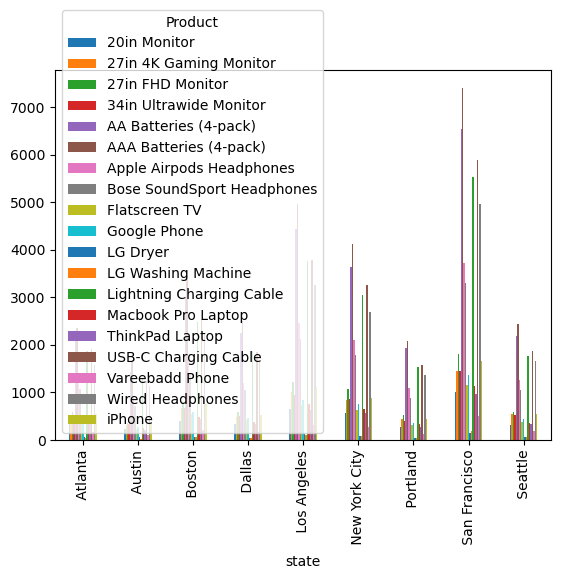

In [24]:
df.groupby(["Product", "state"])["Quantity Ordered"].sum().swaplevel().unstack().plot(kind="bar")
plt.show()

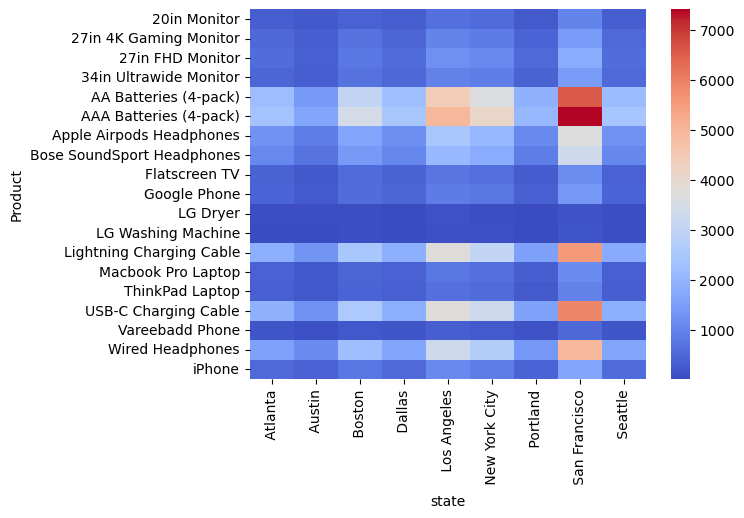

In [25]:
sns.heatmap(df.groupby(["Product", "state"])["Quantity Ordered"].sum().unstack(), cmap='coolwarm')
plt.show()

- #### From all of these plots above, we can say that the most sold items are ["AA Batteries (4-pack)", "AAA Batteries (4-pack)"] and the states with the largest number of sales "San Francisco".

In [28]:
df["total_price"] = df["Quantity Ordered"] * df["Price Each"]

In [29]:
df["Grouped"] = df.groupby(by="Order ID")["Product"].transform(lambda x : ",".join(x))

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,state,total_price,Grouped
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",Austin,700.00,"iPhone,Lightning Charging Cable,Wired Headphones"
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",Austin,14.95,"iPhone,Lightning Charging Cable,Wired Headphones"
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",Austin,23.98,"iPhone,Lightning Charging Cable,Wired Headphones"
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",San Francisco,99.99,Bose SoundSport Headphones
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",San Francisco,379.99,34in Ultrawide Monitor


In [36]:
p = df.groupby(by=[df["Order Date"].dt.day, df["Order Date"].dt.month])["total_price"].sum().unstack()

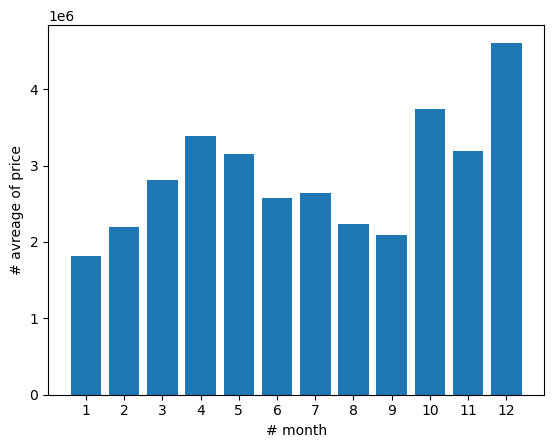

In [70]:
plt.bar(p.columns, p.sum(axis=0))
plt.xticks(np.arange(1, 13))
plt.xlabel("# month")
plt.ylabel("# avreage of price")
plt.show()

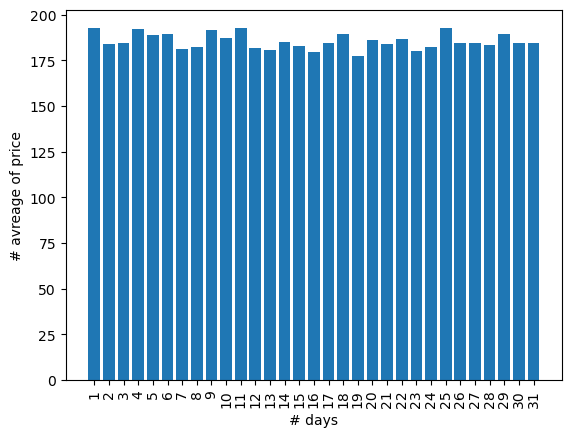

In [139]:
plt.bar(np.arange(1, 32), df.groupby(df["Order Date"].dt.day)["total_price"].mean())
plt.xticks(np.arange(1, 32), rotation = 90)
plt.xlabel("# days")
plt.ylabel("# avreage of price")
plt.show()

- #### From all of these plots above, we can say the day is not affect about the sales but the month is affected, and the month who has a large avreage of sales December-->12 

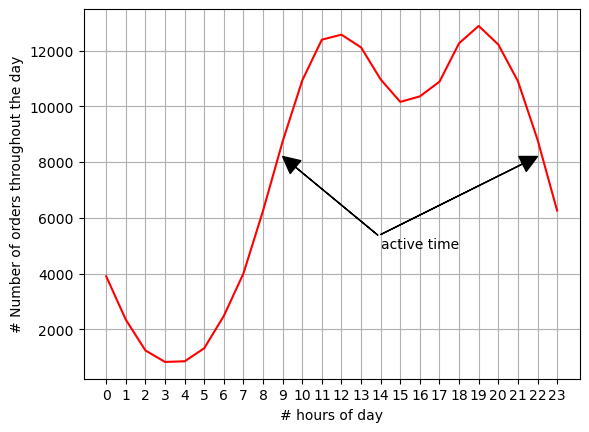

In [163]:
plt.plot(df.groupby(df["Order Date"].dt.hour).count().index, df.groupby(df["Order Date"].dt.hour).count()["Order ID"], color="r")
plt.grid()
plt.annotate("active time", xy=(9,8200), xytext=(14, 4900), arrowprops=dict(facecolor="black", width=.1))
plt.annotate("", xy=(22,8200), xytext=(14, 5400), arrowprops=dict(facecolor="black", width=.1))
plt.xticks(np.arange(24))
plt.xlabel("# hours of day")
plt.ylabel("# Number of orders throughout the day")
plt.show()

- #### From this plot above it became clear to me that most purchases were made from 8Pm to 10Am

In [142]:
date =  df.groupby([df["Order Date"].dt.month, df["Order Date"].dt.day])["total_price"].sum()

In [143]:
y_axis = date.values

In [144]:
date

Order Date  Order Date
1           1              74352.23
            2              70513.20
            3              47046.20
            4              62000.22
            5              46524.63
                            ...    
12          27            126604.07
            28            133601.53
            29            156009.67
            30            151857.82
            31            131439.32
Name: total_price, Length: 365, dtype: float64

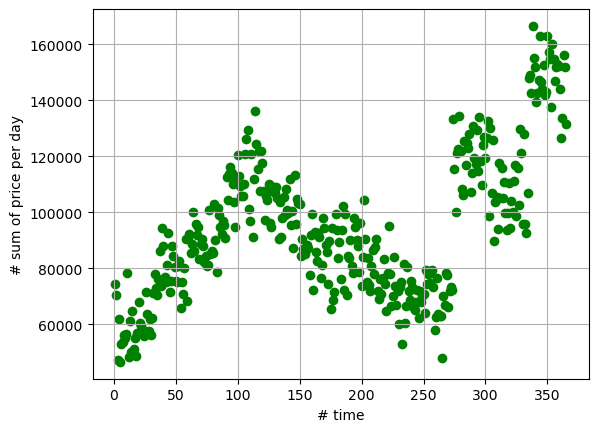

In [167]:
plt.scatter(np.arange(1, 366), date.values, color="g")
plt.xlabel("# time")
plt.ylabel("# sum of price per day")
plt.grid()
plt.show()

- #### scatter plot of sales take curve is increase to reach the top of the curve and decrease from day 100 to day 250 and increase again

# summary 
- A summary of what these data concluded is that the most sold products throughout the year are:
    - AA Batteries (4-pack)
    - AAA Batteries (4-pack)
- The states in which most purchases are made are:
    - San Francisco	
- The purchasing rate increases towards the end of the year, reaching its maximum level. However, the days do not greatly affect the purchase rate. Purchasing rates also increase significantly in the period from 8 Am to 10 Pm. and therefore I suggest increasing advertising rates at this time. It must also be mentioned that throughout the year, purchasing rates increase until it reaches day 100, then it begins to decline, then increases again from day 250.